In [2]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 6.3 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 5.3 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 4.7 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 4.5 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 4.3 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ------------------ -----------

In [3]:
# Visualize the OULAD Graph
import dgl
import torch
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
# Load the processed graph
def load_graph():
    """
    Load the processed DGL graph from the file.
    """
    print("Loading the graph...")
    graph, _ = dgl.load_graphs('../data/processed/oulad_graph_with_features.bin')
    print("Graph loaded successfully!")
    return graph[0]

In [7]:
# Visualize a subgraph
def visualize_graph(graph, edge_type=None, num_nodes=100):
    """
    Visualize a subgraph of the DGL graph using NetworkX.
    """
    if edge_type:
        print(f"Visualizing edge type: {edge_type}")
        subgraph = graph.edge_type_subgraph([edge_type])
    else:
        print("Visualizing a subset of the full graph")
        subgraph = graph

    # Sample a small subset of the nodes for visualization
    sampled_graph = dgl.to_homogeneous(subgraph)
    sampled_nodes = torch.arange(min(num_nodes, sampled_graph.num_nodes()))
    sampled_subgraph = dgl.node_subgraph(sampled_graph, sampled_nodes)

    # Convert to NetworkX
    nx_graph = sampled_subgraph.to_networkx()

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(nx_graph, with_labels=True, node_size=50, font_size=8)
    plt.title("Graph Visualization")
    plt.show()

In [5]:
# Summarize the graph
def summarize_graph(graph):
    """
    Print a summary of the graph, including the node and edge counts for each edge type.
    """
    print("Graph Summary:")
    for edge_type in graph.canonical_etypes:
        src_type, rel_type, dst_type = edge_type
        print(f"Edge Type: {rel_type}")
        print(f"  - Source nodes ({src_type}): {graph.num_nodes(src_type)}")
        print(f"  - Destination nodes ({dst_type}): {graph.num_nodes(dst_type)}")
        print(f"  - Number of edges: {graph.num_edges(edge_type)}\n")

In [8]:
# Summarize the graph
def summarize_graph(graph):
    """
    Print a summary of the graph, including the node and edge counts for each edge type.
    """
    print("Graph Summary:")
    for edge_type in graph.canonical_etypes:
        src_type, rel_type, dst_type = edge_type
        print(f"Edge Type: {rel_type}")
        print(f"  - Source nodes ({src_type}): {graph.num_nodes(src_type)}")
        print(f"  - Destination nodes ({dst_type}): {graph.num_nodes(dst_type)}")
        print(f"  - Number of edges: {graph.num_edges(edge_type)}\n")


Loading the graph...
Graph loaded successfully!
Graph Summary:
Edge Type: includes
  - Source nodes (module): 7
  - Destination nodes (assessment): 40089
  - Number of edges: 206

Edge Type: uses
  - Source nodes (module): 7
  - Destination nodes (material): 1077906
  - Number of edges: 6364

Edge Type: interacted_with
  - Source nodes (student): 28785
  - Destination nodes (material): 1077906
  - Number of edges: 10655280

Edge Type: registered_in
  - Source nodes (student): 28785
  - Destination nodes (module): 7
  - Number of edges: 32593

Edge Type: submitted
  - Source nodes (student): 28785
  - Destination nodes (assessment): 40089
  - Number of edges: 173912

Visualizing edge type: ('student', 'registered_in', 'module')


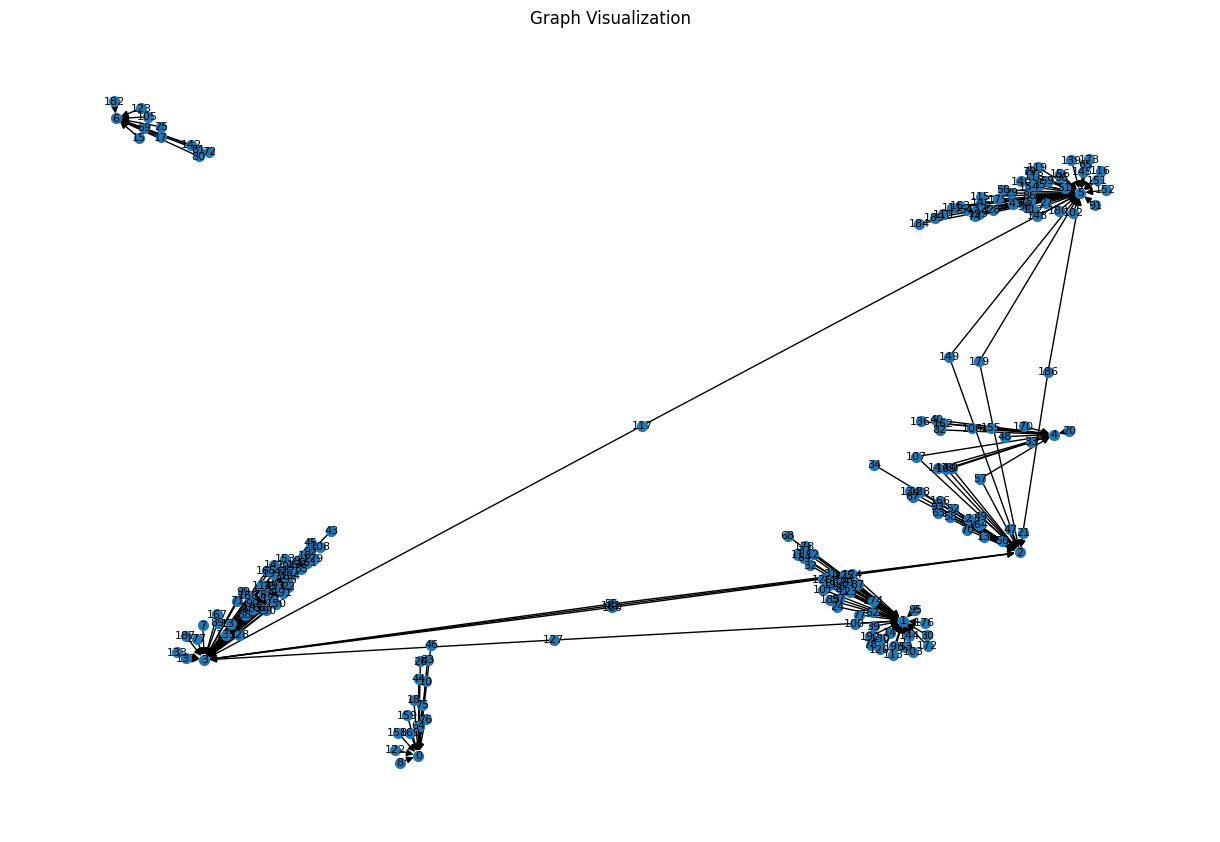

In [10]:
# Load the graph
graph = load_graph()

# Summarize the graph
summarize_graph(graph)

# Visualize a specific edge type (e.g., 'registered_in')
visualize_graph(graph, edge_type=('student', 'registered_in', 'module'), num_nodes=200)